In [4]:
import numpy as np
from random import gauss
import pickle
path = 'd:/largedata/'
pkl_file = open(path + 'data.pkl', 'w') #没有该文件的情况下，open等同于建立一个文件。文件格式为pkl
a = [gauss(1.5, 2) for i in range(1000000)]  #创建一个随机list
%time pickle.dump(a, pkl_file) #将变量a存到刚刚建立的data.pkl文件中

Wall time: 8.49 s


In [5]:
b = [gauss(1.5, 2) for i in range(100)] #加一个c list到文件里
pickle.dump(b, pkl_file) #pickle文件遵从FIFO
pkl_file.close() #关闭打开的文件

In [6]:
b[:5] #c存在于内存

[1.6998405654465298,
 2.6812481561506294,
 2.6190965816701395,
 1.6091546083720152,
 1.9186699611525426]

In [7]:
a[:5]

[2.0741671864438143,
 0.7644952460574136,
 2.502277602073138,
 0.6615050637053347,
 -1.0928472549527521]

In [8]:
pkl_file = open(path + 'data.pkl', 'r')
c = pickle.load(pkl_file) #难道整个data.pkl文件就只存一个list? 

In [9]:
c[:5] #data里面存了a和c, 但是b只调用了a。因为是FIFO

[2.0741671864438143,
 0.7644952460574136,
 2.502277602073138,
 0.6615050637053347,
 -1.0928472549527521]

In [10]:
np.allclose(np.array(a), np.array(c)) #内建方法，检查两个数组是否完全一致

True

In [11]:
np.sum(np.array(a) - np.array(c)) #用差值检验是否一致

0.0

In [12]:
d = pickle.load(pkl_file)

In [13]:
d[:5] #第二次，调用的就是第二个数组

[1.6998405654465298,
 2.6812481561506294,
 2.6190965816701395,
 1.6091546083720152,
 1.9186699611525426]

In [14]:
pkl_file.close()

In [15]:
pkl_file = open(path + 'data.pkl', 'w')
x = np.array(a)
y = np.array(b) ** 2 
pickle.dump({'x':x, 'y':y}, pkl_file) # 为了便于提取，使用字典方式储存。此外，如果调用narray，储存的速度大幅提高
pkl_file.close()

In [16]:
pkl_file = open(path + 'data.pkl', 'r')
data = pickle.load(pkl_file) #调入内存
pkl_file.close() #立刻关闭
for key in data.keys(): #调用所有的key，做循环
    print key, data[key][:5]  




y [ 2.88945795  7.18909167  6.8596669   2.58937855  3.68129442]
x [ 2.07416719  0.76449525  2.5022776   0.66150506 -1.09284725]


In [17]:
rows = 5000
a = np.random.standard_normal((rows,5)) #建立随机数组
a.round(4)


array([[-0.4808,  0.3905,  0.3869, -2.0915, -0.5705],
       [ 1.7641, -0.6601, -0.4767,  0.5111,  2.0037],
       [ 0.1026,  0.2095, -1.3924,  0.0675,  1.3464],
       ..., 
       [-2.0064, -0.5481,  0.5545, -0.9683,  1.0002],
       [ 0.1836,  0.0831,  0.5952, -0.3426, -0.1898],
       [ 0.1993, -0.0312,  0.4591, -0.8006, -0.2647]])

In [18]:
import pandas as pd
t = pd.date_range(start='2015/1/1', periods=rows, freq='H', )  #建立一个世界序列datetime以便加到前面数组做序列
t


DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00',
               ...
               '2015-07-27 22:00:00', '2015-07-27 23:00:00',
               '2015-07-28 00:00:00', '2015-07-28 01:00:00',
               '2015-07-28 02:00:00', '2015-07-28 03:00:00',
               '2015-07-28 04:00:00', '2015-07-28 05:00:00',
               '2015-07-28 06:00:00', '2015-07-28 07:00:00'],
              dtype='datetime64[ns]', length=5000, freq='H')

In [19]:
csv_file = open(path + 'data.csv', 'w') #建立一个csv，可写模式打开
header = 'date,no1,no2,no3,no4,no5\n' #csv是文本文件，所以用字符串写，之间也on用逗号连接. \n用于换行
csv_file.write(header) #写入第一行

In [20]:
for t_, (no1, no2, no3, no4, no5) in zip(t, a):
    s = '%s,%f,%f,%f,%f,%f\n' %(t_, no1, no2, no3, no4, no5) #因为是csv所以都是字符串
    csv_file.write(s)
csv_file.close()

In [21]:
csv_file = open(path + 'data.csv', 'r')
content = csv_file.readlines() #d读取文件
csv_file.close() #调入内存后关闭文件
for line in content[:5]:
    print line

date,no1,no2,no3,no4,no5

2015-01-01 00:00:00,-0.480751,0.390521,0.386945,-2.091499,-0.570491

2015-01-01 01:00:00,1.764098,-0.660052,-0.476692,0.511112,2.003715

2015-01-01 02:00:00,0.102626,0.209547,-1.392403,0.067534,1.346433

2015-01-01 03:00:00,0.394722,-1.005469,0.465989,-1.115064,-0.779958



In [22]:
import numpy as np
dtimes = np.arange('2015-01-01 10:00:00', '2021-12-31 22:00:00', dtype='datetime64[m]') #用np建立时间序列datetime数据
len(dtimes)

3681360

In [23]:
dty = np.dtype([('Date', 'datetime64[m]'), ('No1', 'f'), ('No2', 'f')]) #确定数组每一个列的数据格式
data = np.zeros(len(dtimes), dtype=dty) #建立0数组
data['Date'] = dtimes

In [24]:
a = np.random.standard_normal((len(dtimes),2)).round(5) #建立数组
data['No1'] = a[:, 0]
data['No2'] = a[:, 1]

numpy的特点是不需要open,直接储存或载入

In [25]:
%time np.save(path + 'array.npy', data) #直接建立一个文件储存 用save。后缀名npy

Wall time: 656 ms


In [26]:
%time np.load(path + 'array.npy')

Wall time: 60 ms


array([ (datetime.datetime(2015, 1, 1, 10, 0), -0.5841400027275085, -0.4941200017929077),
       (datetime.datetime(2015, 1, 1, 10, 1), 2.257009983062744, 0.007290000095963478),
       (datetime.datetime(2015, 1, 1, 10, 2), -0.2072100043296814, -0.613319993019104),
       ...,
       (datetime.datetime(2021, 12, 31, 21, 57), 0.8273400068283081, 0.03748000040650368),
       (datetime.datetime(2021, 12, 31, 21, 58), 0.7021700143814087, 0.043549999594688416),
       (datetime.datetime(2021, 12, 31, 21, 59), 0.30504000186920166, 0.49474000930786133)], 
      dtype=[('Date', '<M8[m]'), ('No1', '<f4'), ('No2', '<f4')])

In [27]:
import numpy as np 
data = np.random.standard_normal((10000,6000))
%time np.save(path + 'array.npy', data)

Wall time: 9.64 s


In [28]:
%time np.load(path + 'array.npy') #读写大文件的速度很快

Wall time: 399 ms


array([[ 1.72075042, -0.42821874,  0.1655294 , ...,  0.54330843,
        -0.37949395,  0.15141067],
       [-0.71139541, -0.08968587, -0.086834  , ...,  1.37684647,
        -0.5666675 ,  1.55422488],
       [ 0.11096863, -2.14434134,  0.86618253, ..., -0.620593  ,
        -1.44542832,  1.62351013],
       ..., 
       [-0.29898654,  0.49037818, -0.29844674, ..., -1.74833574,
        -1.47206106, -0.77135582],
       [ 0.2084759 ,  1.300471  ,  1.71948741, ...,  0.60348876,
        -1.08647888, -1.7056296 ],
       [ 0.22751882,  0.86517249,  0.20049702, ...,  1.86121011,
         0.10288803, -0.61264662]])

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
data = np.random.standard_normal((1000000,5)).round(5)
filename = path + 'numbs'



以下考验panas的读写能力。 pandas能够读写多种格式的数据csv, sql, json等

Wall time: 539 ms


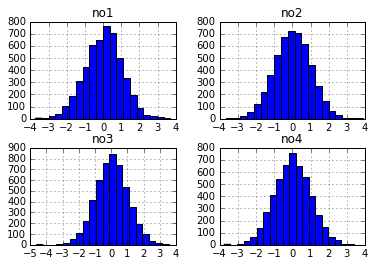

In [30]:
%time pd.read_csv(path + 'data.csv', header=0, index_col=0)[['no1','no2','no3','no4']].hist(bins=20) #读取速度很快
plt.grid(True)

这里没有pd的文件。如果是pd的文件，可以直接 .to_csv(path)储存到硬盘。 也不需要open这一步骤

In [31]:
data = pd.read_csv(path + 'data.csv', header=0, index_col=0)

In [32]:
type(data)

pandas.core.frame.DataFrame

In [33]:
%time data.to_excel(path + 'data.xlsx') 

Wall time: 1.59 s


Wall time: 1.34 s


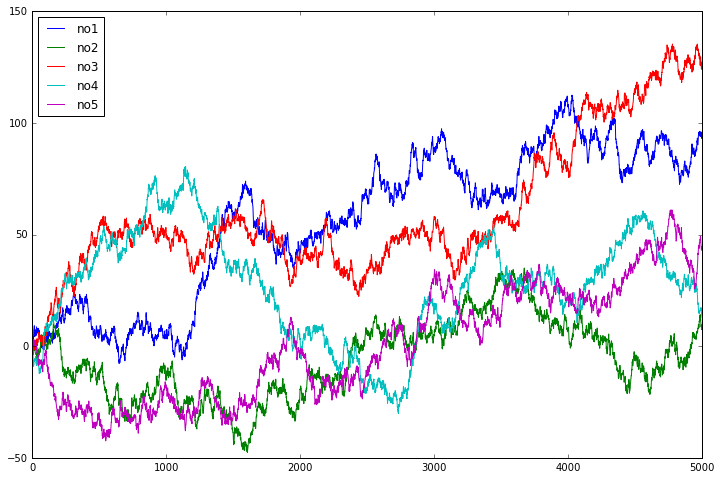

In [34]:
%time pd.read_excel(path + 'data.xlsx', 'Sheet1').cumsum().plot(figsize=(12,8))


In [35]:
import pandas as pd 
import numpy as np
import tables as tb 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
# path = 'd:/largedata/'
# filename = path + 'tab.h5'
# h5.close()
# h5 = tb.open_file(filename, 'w') #使用table库建立一个h5文件
# row = 2000000

In [ ]:
教材上都是讲的pytable，有更简单的直接使用pandas进行hdf5读写的方法

In [44]:
import numpy as np
import pandas as pd 
from pandas import HDFStore, DataFrame
path = 'd:/largedata/'
hdf = HDFStore(path + 'storage.h5') #首先要用HDFStore命令建立一个H5文件 

In [45]:
data_1 = DataFrame(np.random.standard_normal((5,3)), columns=('A','B','C')) 
hdf.put('data01', data_1, format='table', data_columns=True) #将DataFrame数据对象储存到h5文件中。名称这个数据的key起名为data01

In [46]:
data_2 = DataFrame(np.random.standard_normal((5,3)), columns=('A','B','C')) 
hdf.put('data02', data_2, format='table', data_columns=True)  #再存一个DataFrame ，key命名为data02. 以句柄为起点储存。也有DF.to_hdf另一个方法

In [47]:
hdf.keys()

['/data01', '/data02']

In [48]:
# hdf.append('data01', DataFrame(np.random.standard_normal((5,3))), columns=('A','B','C'), format='table', data_columns=True) 
#实在加不上


In [49]:
hdf.close() # hdf是整个h5文件的控制句柄，所以能够close

In [50]:
read_hdf = pd.read_hdf(path + 'storage.h5', 'data01') #k可以直接读取h5，不需要open这一步。但是，似乎并没有打开文件，仅读取了一个dataframe
# read_hdf.close() #所以，如果试图关闭read_hef会发现，该句柄没有close功能，因为本来就没有打开


In [51]:
read_hdf

,A,B,C
0,-0.666760,-0.699977,1.364432
1,-0.141583,-1.014285,1.002815
2,0.487577,0.853275,-0.024351
3,-1.296415,-2.496725,0.993321
4,1.111317,0.093188,0.860614


In [52]:
read_hdf.append(DataFrame(np.random.standard_normal((5,3)), columns=('A','B','C')), ignore_index=True)
#columns一定要套在新建的df里面
# 忽视原先的index
#但是这里是对读入内存的df增加行，并没有改变h5中的数据

,A,B,C
0,-0.666760,-0.699977,1.364432
1,-0.141583,-1.014285,1.002815
2,0.487577,0.853275,-0.024351
3,-1.296415,-2.496725,0.993321
4,1.111317,0.093188,0.860614
5,1.202009,1.034668,-1.858711
6,-0.960463,0.617277,-0.114428
7,0.963792,1.453314,-2.131400
8,0.823107,0.479903,-1.014427
9,-1.101166,0.225944,-1.030688


In [53]:
#该命令，可用于建立文件，也可用于打开调用文件
hdf = HDFStore(path + 'storage.h5') 

In [54]:
hdf['data01']

,A,B,C
0,-0.666760,-0.699977,1.364432
1,-0.141583,-1.014285,1.002815
2,0.487577,0.853275,-0.024351
3,-1.296415,-2.496725,0.993321
4,1.111317,0.093188,0.860614


In [55]:
hdf.append('data01', DataFrame(np.random.standard_normal((5,3)), columns=('A','B','C')), format='table', data_columns=True, ignore_index=True)
#调用文件句柄，为一个表格添加行
#该方法下的添加将修改硬盘数据，实现永久修改

In [56]:
hdf['data01']

,A,B,C
0,-0.666760,-0.699977,1.364432
1,-0.141583,-1.014285,1.002815
2,0.487577,0.853275,-0.024351
3,-1.296415,-2.496725,0.993321
4,1.111317,0.093188,0.860614
0,0.185457,2.166251,-1.950527
1,0.067699,-1.107949,-0.693362
2,-1.726343,-0.604205,-1.206487
3,-0.271821,0.657102,-0.312880
4,-1.871111,0.004856,-0.780127


In [57]:
hdf.keys()

['/data01', '/data02']

In [58]:
print hdf #打印hdf中内含文件

<class 'pandas.io.pytables.HDFStore'>
File path: d:/largedata/storage.h5
/data01            frame_table  (typ->appendable,nrows->10,ncols->3,indexers->[index],dc->[A,B,C])
/data02            frame_table  (typ->appendable,nrows->5,ncols->3,indexers->[index],dc->[A,B,C]) 


In [59]:
hdf.close()

In [60]:
df = pd.DataFrame(np.random.standard_normal((5,3))) #建立一个df
df.to_hdf(path + 'storage.h5', 'data03', append=True) #直接将df加入h5文件

In [61]:
hdf = HDFStore(path + 'storage.h5')

In [62]:
print hdf

<class 'pandas.io.pytables.HDFStore'>
File path: d:/largedata/storage.h5
/data01            frame_table  (typ->appendable,nrows->10,ncols->3,indexers->[index],dc->[A,B,C])
/data02            frame_table  (typ->appendable,nrows->5,ncols->3,indexers->[index],dc->[A,B,C]) 
/data03            frame_table  (typ->appendable,nrows->5,ncols->3,indexers->[index])             


In [63]:
hdf.close()

In [64]:
hdf = HDFStore(path + 'storage.h5')
hdf['data01']

,A,B,C
0,-0.666760,-0.699977,1.364432
1,-0.141583,-1.014285,1.002815
2,0.487577,0.853275,-0.024351
3,-1.296415,-2.496725,0.993321
4,1.111317,0.093188,0.860614
0,0.185457,2.166251,-1.950527
1,0.067699,-1.107949,-0.693362
2,-1.726343,-0.604205,-1.206487
3,-0.271821,0.657102,-0.312880
4,-1.871111,0.004856,-0.780127


In [65]:
#用打开文件的方法调用一个df，然后添加，观察是否是修改硬盘位置
hdf['data02'].append(DataFrame(np.random.standard_normal((5,3)), columns=('A','B','C')), ignore_index=True) 


,A,B,C
0,0.285117,0.186563,-0.086381
1,-0.050505,1.498557,-0.870170
2,0.482023,-0.939811,-1.085934
3,-1.539818,-0.244565,-0.052588
4,0.817497,-0.422076,-0.823467
5,1.124246,-0.215339,-0.751751
6,-0.612939,-0.591645,0.073005
7,1.324204,2.362100,-0.600790
8,-1.146211,-0.931807,-1.923845
9,0.370655,1.212017,-1.138683


In [66]:
hdf.close()

In [67]:
hdf = HDFStore(path + 'storage.h5')
hdf['data02']
#结果发现并没有修改硬盘位置的数据，唯一能修改的方法是hdf.append()。任何先调用，后修改的方法都仅仅修改内存位置

,A,B,C
0,0.285117,0.186563,-0.086381
1,-0.050505,1.498557,-0.870170
2,0.482023,-0.939811,-1.085934
3,-1.539818,-0.244565,-0.052588
4,0.817497,-0.422076,-0.823467


In [68]:
hdf['data02'].append(DataFrame(np.random.standard_normal((5,3)), columns=('A','B','C')), ignore_index=True) 
#先读取

,A,B,C
0,0.285117,0.186563,-0.086381
1,-0.050505,1.498557,-0.870170
2,0.482023,-0.939811,-1.085934
3,-1.539818,-0.244565,-0.052588
4,0.817497,-0.422076,-0.823467
5,-0.599549,-1.810929,0.696459
6,1.761945,0.179663,0.525489
7,-0.605755,-0.179308,0.500436
8,0.009698,-0.097602,-1.114657
9,-0.664224,0.395266,-0.313272


In [69]:
hdf.flush() #flush也无效啊

In [70]:
hdf['data02']

,A,B,C
0,0.285117,0.186563,-0.086381
1,-0.050505,1.498557,-0.870170
2,0.482023,-0.939811,-1.085934
3,-1.539818,-0.244565,-0.052588
4,0.817497,-0.422076,-0.823467


In [71]:
hdf['data02'] = hdf['data02'].append(DataFrame(np.random.standard_normal((5,3)), columns=('A','B','C')), ignore_index=True) 
#用这个方法修改硬盘数据

In [72]:
hdf['data02']
#成功

,A,B,C
0,0.285117,0.186563,-0.086381
1,-0.050505,1.498557,-0.870170
2,0.482023,-0.939811,-1.085934
3,-1.539818,-0.244565,-0.052588
4,0.817497,-0.422076,-0.823467
5,0.754588,-1.559928,0.207480
6,0.456891,0.571227,0.060167
7,2.664875,1.203371,-0.388795
8,1.547306,1.756435,0.277848
9,0.438256,0.488127,0.146742


In [86]:
hdf.close()
randm =  np.random.standard_normal((100000,2000))
df = DataFrame(randm)


In [78]:
type(df)

pandas.core.frame.DataFrame

In [80]:
%time df.to_hdf(path + 'storage.h5', 'data05') #不知道为啥，只要加上append=True就报错

Wall time: 31.4 s


In [95]:
hdf = HDFStore(path + 'storage.h5')
%time hdf.put('data06', df, format=None, append=False) #要加上append=True就报错,而且format不能用table

Wall time: 36 s


In [96]:
print hdf

<class 'pandas.io.pytables.HDFStore'>
File path: d:/largedata/storage.h5
/data01            frame_table  (typ->appendable,nrows->10,ncols->3,indexers->[index],dc->[A,B,C])
/data02            frame        (shape->[10,3])                                                   
/data03            frame_table  (typ->appendable,nrows->5,ncols->3,indexers->[index])             
/data04            frame_table  (typ->appendable,nrows->None,ncols->0,indexers->[])               
/data05            frame        (shape->[100000,2000])                                            
/data06            frame        (shape->[100000,2000])                                            
